In [143]:
%load_ext autoreload
%autoreload 2
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt
from utils import load, plot_history, compose_alpha
from models import own_custom_conv_net, neuralmon_conv_net, smaller_VGGNet, custom_CNN_model

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
def custom_CNN_model(input_shape):
    model = models.Sequential([
        layers.Conv2D(16, (3, 3), activation='relu', input_shape=input_shape), 
        layers.BatchNormalization(), 
        layers.MaxPooling2D((2, 2)),   
        
        layers.Conv2D(32, (3, 3), activation='relu'), 
        layers.BatchNormalization(), 
        layers.MaxPooling2D((2, 2)), 
        
        layers.Conv2D(64, (3, 3), activation='relu'), 
        layers.BatchNormalization(), 
        layers.MaxPooling2D((2, 2)), 

        layers.Conv2D(128, (3, 3), activation='relu'), 
        layers.BatchNormalization(), 
        layers.MaxPooling2D((2, 2)), 
        
        layers.Conv2D(150, (3, 3), activation='relu'), 
        layers.BatchNormalization(), 
        layers.MaxPooling2D((2, 2)), 
        
        layers.Flatten(), 
        layers.Dense(64, activation='relu'), 
        layers.Dense(18, activation='sigmoid'), 
    ])
    
    return model

In [2]:
train_dataset, val_dataset = load(csv="pokemon_image_dataset.csv", image_path="./images/pokemon_image_dataset")

In [3]:
histories = []

In [7]:
def compute_class_weights(dataset):
    # Initialize counters
    positive_counts = tf.zeros(18, dtype=tf.int32)
    total_samples = 0

    # Iterate over the dataset
    for _, labels in dataset:
        positive_counts += tf.reduce_sum(labels, axis=0)
        total_samples += tf.shape(labels)[0]

    # Convert to numpy for easier manipulation
    positive_counts = positive_counts.numpy()
    total_samples = total_samples.numpy()

    # Calculate class weights
    class_weights = {}
    for i in range(18):
        if positive_counts[i] > 0:
            class_weights[i] = (1 / positive_counts[i]) * (total_samples / 2.0)
        else:
            class_weights[i] = 1.0  # Assign a neutral weight if the class doesn't appear

    return class_weights

class_weights = compute_class_weights(train_dataset)
print(class_weights)

{0: 3.235, 1: 3.718390804597701, 2: 3.9451219512195124, 3: 3.897590361445783, 4: 4.8283582089552235, 5: 5.0546875, 6: 5.675438596491228, 7: 6.47, 8: 6.739583333333333, 9: 6.882978723404255, 10: 7.890243902439025, 11: 9.803030303030303, 12: 8.294871794871794, 13: 7.702380952380952, 14: 8.743243243243244, 15: 9.242857142857142, 16: 9.51470588235294, 17: 12.442307692307693}


In [8]:
model_BCLoss = custom_CNN_model((120,120,4))

model_BCLoss.compile(optimizer='adam',
            loss='binary_crossentropy',
            metrics=['accuracy', 'AUC', 'Precision', 'Recall'])

history1 = model_BCLoss.fit(
    train_dataset,
    epochs = 35,
    validation_data = val_dataset,
    verbose = 1
)
histories.append(history1)

Epoch 1/35


c:\Uni\Enhancing-Pokemon-Type-Recognition-with-Hybrid-Datasets\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 6s 139ms/step - AUC: 0.5442 - Precision: 0.1085 - Recall: 0.2139 - accuracy: 0.1021 - loss: 0.5238 - val_AUC: 0.4588 - val_Precision: 0.0763 - val_Recall: 0.4588 - val_accuracy: 0.0309 - val_loss: 0.7039
Epoch 2/35
21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 121ms/step - AUC: 0.6657 - Precision: 0.1263 - Recall: 0.0033 - accuracy: 0.2209 - loss: 0.2742 - val_AUC: 0.4319 - val_Precision: 0.0732 - val_Recall: 0.7102 - val_accuracy: 0.0370 - val_loss: 1.0270
Epoch 3/35
21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 119ms/step - AUC: 0.7663 - Precision: 0.5262 - Recall: 0.0211 - accuracy: 0.3672 - loss: 0.2544 - val_AUC: 0.4440 - val_Precision: 0.0763 - val_Recall: 0.8155 - val_accuracy: 0.0494 - val_loss: 1.2446
Epoch 4/35
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 118ms/step - AUC: 0.8206 - Precision: 0.7696 - Recall: 0.0653 - accuracy: 0.4029 - loss: 0.2320 - val_AUC: 0.4356 - val_Precision: 0.0733 - val_Recall: 0.7265 - val_accuracy: 0.0247 - val_loss: 1.3392
Epoch 5/35
21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 12

In [9]:
model_BCLoss_weighted = custom_CNN_model((120,120,4))

model_BCLoss_weighted.compile(optimizer='adam',
            loss='binary_crossentropy',
            metrics=['accuracy', 'AUC', 'Precision', 'Recall'])

history2 = model_BCLoss_weighted.fit(
    train_dataset,
    epochs = 35,
    validation_data = val_dataset,
    verbose = 1,
    class_weight=class_weights
)
histories.append(history2)

Epoch 1/35
21/21 ━━━━━━━━━━━━━━━━━━━━ 6s 135ms/step - AUC: 0.4786 - Precision: 0.0728 - Recall: 0.1570 - accuracy: 0.0432 - loss: 2.7725 - val_AUC: 0.5276 - val_Precision: 0.0779 - val_Recall: 0.0960 - val_accuracy: 0.0556 - val_loss: 0.5930
Epoch 2/35
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 116ms/step - AUC: 0.6659 - Precision: 0.2412 - Recall: 0.0048 - accuracy: 0.1762 - loss: 1.4467 - val_AUC: 0.5206 - val_Precision: 0.0770 - val_Recall: 0.2636 - val_accuracy: 0.0494 - val_loss: 0.6264
Epoch 3/35
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 116ms/step - AUC: 0.7597 - Precision: 0.6124 - Recall: 0.0225 - accuracy: 0.2721 - loss: 1.3008 - val_AUC: 0.5029 - val_Precision: 0.0805 - val_Recall: 0.3133 - val_accuracy: 0.0617 - val_loss: 0.7026
Epoch 4/35
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 115ms/step - AUC: 0.8348 - Precision: 0.7347 - Recall: 0.0478 - accuracy: 0.4191 - loss: 1.1759 - val_AUC: 0.5019 - val_Precision: 0.0675 - val_Recall: 0.3026 - val_accuracy: 0.0617 - val_loss: 0.7230
Epoch 5/35
21/21 ━━━━━━━━━━━━━━━

In [10]:
model_BCFLoss = custom_CNN_model((120,120,4))

model_BCFLoss.compile(optimizer='adam',
            loss='binary_focal_crossentropy',
            metrics=['accuracy', 'AUC', 'Precision', 'Recall'])

history3 = model_BCFLoss.fit(
    train_dataset,
    epochs = 35,
    validation_data = val_dataset,
    verbose = 1
)
histories.append(history3)

Epoch 1/35
21/21 ━━━━━━━━━━━━━━━━━━━━ 6s 148ms/step - AUC: 0.5132 - Precision: 0.0723 - Recall: 0.1606 - accuracy: 0.0544 - loss: 0.2118 - val_AUC: 0.5578 - val_Precision: 0.0985 - val_Recall: 0.4232 - val_accuracy: 0.1358 - val_loss: 0.1652
Epoch 2/35
21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 119ms/step - AUC: 0.7001 - Precision: 0.2979 - Recall: 0.0534 - accuracy: 0.2165 - loss: 0.0745 - val_AUC: 0.4985 - val_Precision: 0.0780 - val_Recall: 0.6844 - val_accuracy: 0.0494 - val_loss: 0.3204
Epoch 3/35
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 117ms/step - AUC: 0.7980 - Precision: 0.5664 - Recall: 0.1002 - accuracy: 0.3401 - loss: 0.0662 - val_AUC: 0.4582 - val_Precision: 0.0771 - val_Recall: 0.6529 - val_accuracy: 0.0370 - val_loss: 0.5359
Epoch 4/35
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 112ms/step - AUC: 0.8603 - Precision: 0.7600 - Recall: 0.1752 - accuracy: 0.4542 - loss: 0.0565 - val_AUC: 0.4890 - val_Precision: 0.0862 - val_Recall: 0.6667 - val_accuracy: 0.0309 - val_loss: 0.6583
Epoch 5/35
21/21 ━━━━━━━━━━━━━━━

ValueError: not enough values to unpack (expected 3, got 2)

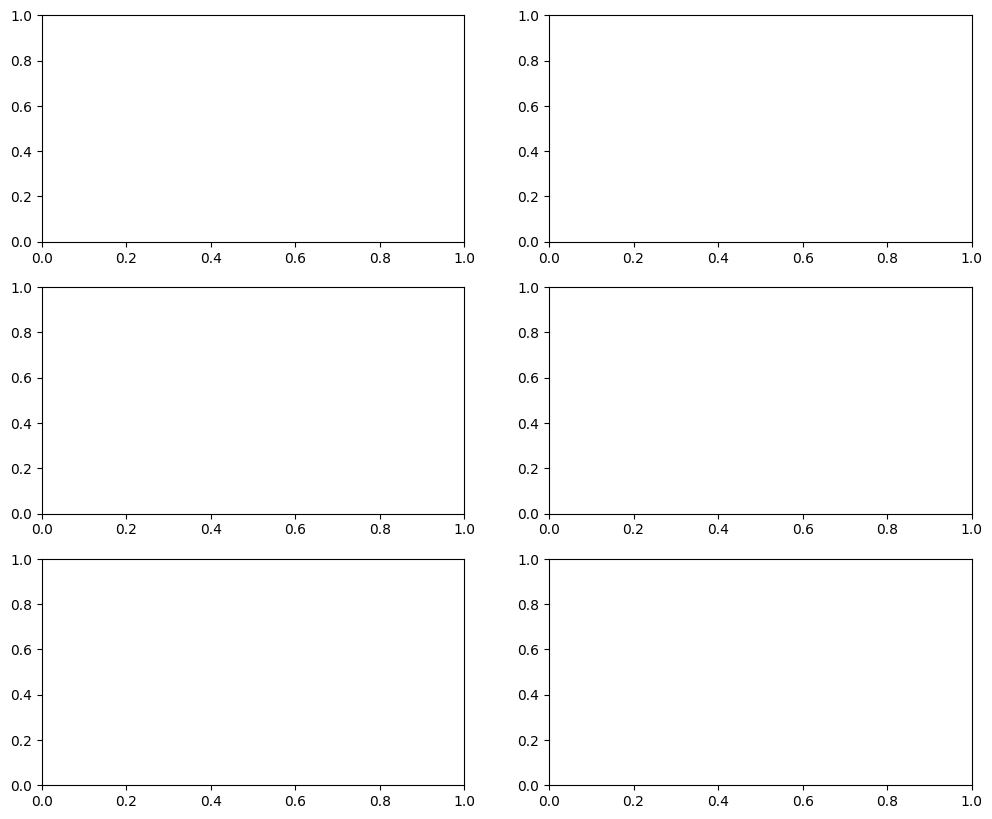

In [165]:
def plot_history(histories):
    # Create a figure with two subplots: one for loss, one for accuracy
    fig, axs = plt.subplots(len(histories), 2, figsize=(12, 10))
    print((zip(histories,axs)))
    for i, (history, ax1, ax2) in enumerate(zip(histories,axs)):
        # Iterate over each history and label to plot on the same figure
        # Plot all metrics included in the history object
        for key in history.history.keys():
            # check if the key includes "val" or not
            if 'val' in key:
                ax2.plot(history.history[key], label='Model '+str(i+1)+' '+key)
            else:
                ax1.plot(history.history[key], label='Model '+str(i+1)+' '+key)

        # Customize loss subplot
        ax1.set_xlabel('Epoch')
        ax1.set_ylabel('Loss')
        ax1.set_title('Training Over Epochs')
        ax1.legend()
        ax1.set_xlim(left=0)  # Ensure the x-axis starts at 0

        # Customize accuracy subplot
        ax2.set_xlabel('Epoch')
        ax2.set_ylabel('Accuracy')
        ax2.set_title('Validation Over Epochs')
        ax2.legend()
        ax2.set_xlim(left=0)  # Ensure the x-axis starts at 0
    # Adjust layout and display the plot
    plt.tight_layout()
    plt.show()
    
plot_history(histories)

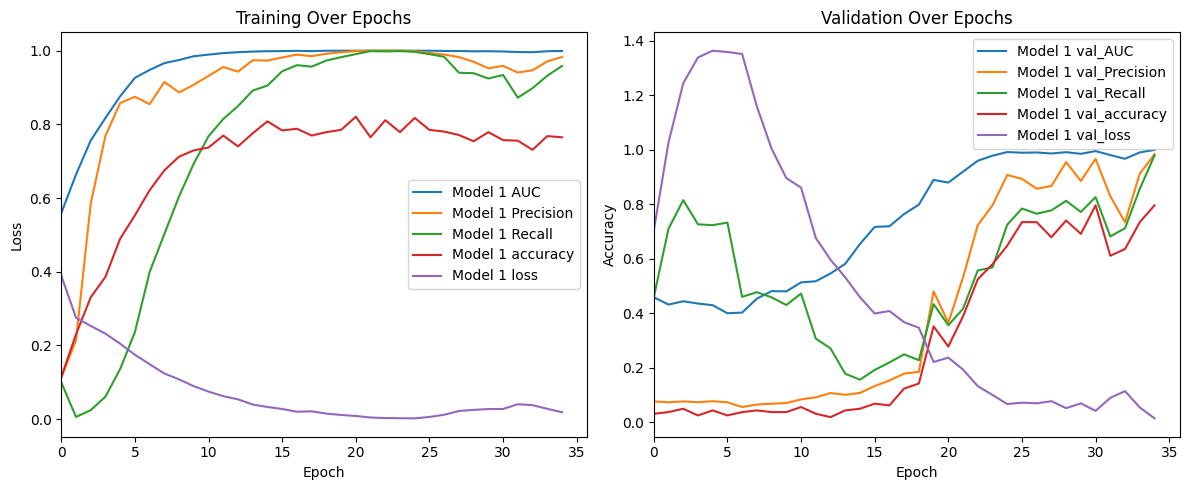

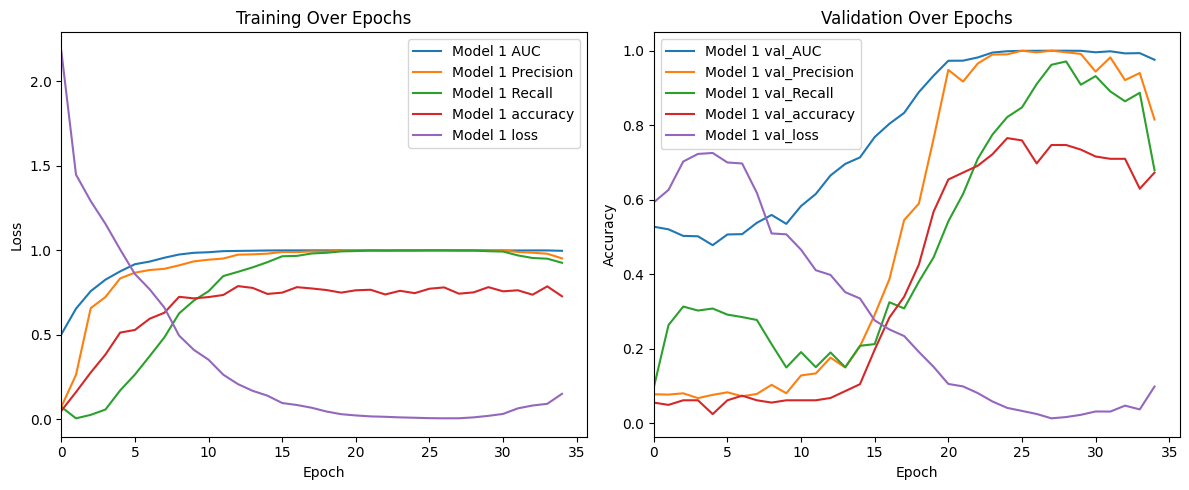

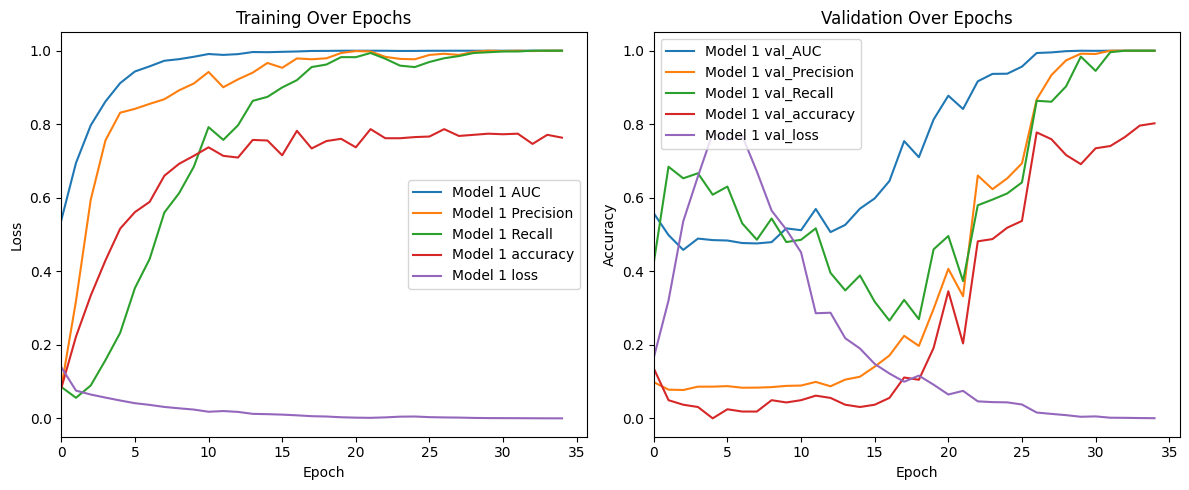

In [148]:
def plot_history(histories):
    # Create a figure with two subplots: one for loss, one for accuracy
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

    # Iterate over each history and label to plot on the same figure
    for i, history in enumerate(histories):
        
        # Plot all metrics included in the history object
        for key in history.history.keys():
            # check if the key includes "val" or not
            if 'val' in key:
                ax2.plot(history.history[key], label='Model '+str(i+1)+' '+key)
            else:
                ax1.plot(history.history[key], label='Model '+str(i+1)+' '+key)

    # Customize loss subplot
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Loss')
    ax1.set_title('Training Over Epochs')
    ax1.legend()
    ax1.set_xlim(left=0)  # Ensure the x-axis starts at 0

    # Customize accuracy subplot
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy')
    ax2.set_title('Validation Over Epochs')
    ax2.legend()
    ax2.set_xlim(left=0)  # Ensure the x-axis starts at 0

    # Adjust layout and display the plot
    plt.tight_layout()
    plt.show()
    
for history in histories:
    plot_history([history])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
tf.Tensor([0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0], shape=(18,), dtype=int32)
[0.    0.999 1.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.001 0.02  0.    0.    0.   ]
(120, 120, 3)


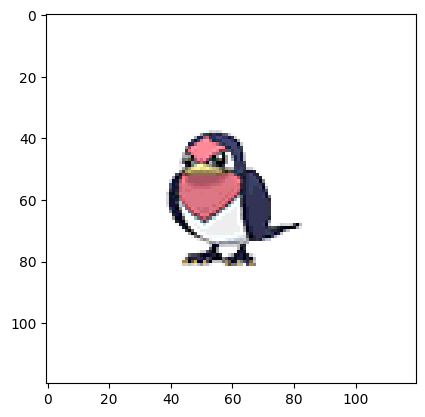

In [147]:
for sample in val_dataset:
    pred = model_BCLoss.predict(sample[0])
    print(sample[1][0])
    print(np.around(pred[0], decimals=3))
    img = compose_alpha(sample[0][0].numpy()*255)
    print(img.shape)
    plt.imshow(img, interpolation='nearest')
    plt.show()
    break